# Quant Challenge 2025

Harrison Owens --> hjowens@uchicago.edu

## Fetching data

Also combining them here with the additional columns.

In [3]:
import pandas as pd

# load original data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# load extra columns

train_extra = pd.read_csv('data/train_new.csv')
test_extra = pd.read_csv('data/test_new.csv')

train_full = pd.concat([train, train_extra], axis = 1)
test_full = pd.concat([test, test_extra], axis = 1)

print(train_full.shape, test_full.shape)
print(train_full.columns.tolist())
print(train_full.head())

(80000, 19) (15996, 18)
['time', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Y1', 'Y2', 'O', 'P']
   time         A         B         C         D         E         F         G  \
0     0  0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1     1  0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2     2 -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3     3  0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4     4  0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

          H         I         J         K         L         M         N  \
0 -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965   
1  0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401   
2  0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261   
3  1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.548993  0.471031   
4  0.863372 -

In [5]:
desc = train_full.describe(include='all').T
print(desc.loc[['Y1', 'Y2']], ['mean', 'std', 'min', '25%', '50%', '75%', 'max'])

      count      mean       std        min       25%       50%       75%  \
Y1  80000.0 -0.002807  0.970655 -28.918180 -0.387523 -0.001591  0.392470   
Y2  80000.0 -0.061172  0.923702  -0.850799 -0.497802 -0.318091  0.026905   

          max  
Y1  29.859458  
Y2  34.636039   ['mean', 'std', 'min', '25%', '50%', '75%', 'max']


## Looking at distributions of Y1 and Y2

Text(0, 0.5, 'Frequency')

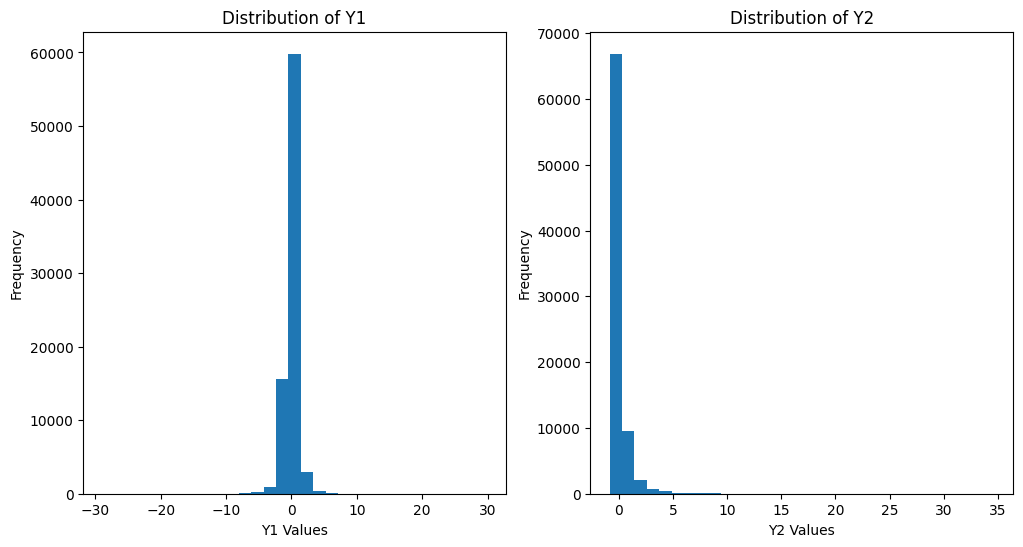

In [11]:
import  matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(train_full['Y1'].dropna(), bins=31)
axes[0].set_title('Distribution of Y1')
axes[0].set_xlabel('Y1 Values')
axes[0].set_ylabel('Frequency')

axes[1].hist(train_full['Y2'].dropna(), bins=31)
axes[1].set_title('Distribution of Y2')
axes[1].set_xlabel('Y2 Values')
axes[1].set_ylabel('Frequency')

Y1 centered on 0. Y2 skewed above 0, but predominately placed on/near 0.

## Correlations

Correlations with Y1:
 G    0.814568
J    0.723921
H    0.707560
C    0.703823
M    0.686246
E    0.684297
N    0.595766
O    0.177676
B   -0.094995
I   -0.090226
Name: Y1, dtype: float64
Correlations with Y2:
 D    0.611063
K    0.599183
B    0.581859
I    0.508347
L    0.503546
F    0.496667
A    0.484746
O    0.167684
J   -0.097986
M   -0.095326
Name: Y2, dtype: float64


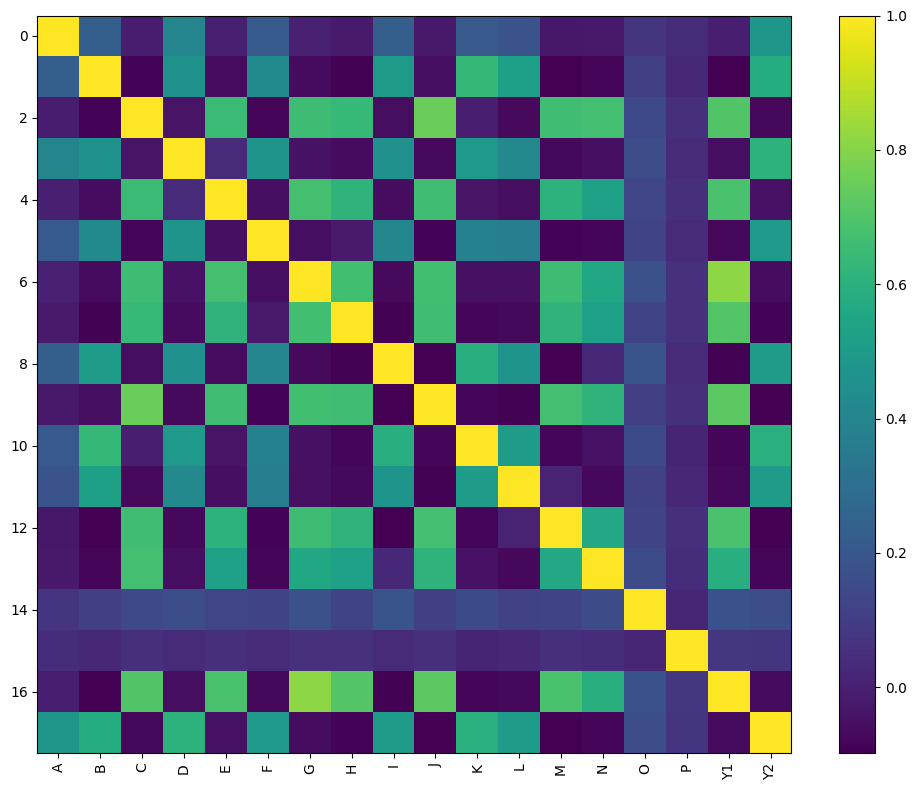

In [22]:
import numpy as np

targets = ['Y1', 'Y2']
features = [c for c in train_full.columns if c not in targets and c != "time"]

# Correlation matrix

corr = train_full[features + targets].corr()

corr_y1 = corr['Y1'].drop(labels=targets).sort_values(key = lambda s: s.abs(), ascending=False)
corr_y2 = corr['Y2'].drop(labels=targets).sort_values(key = lambda s: s.abs(), ascending=False)

print("Correlations with Y1:\n", corr_y1.head(10))
print("Correlations with Y2:\n", corr_y2.head(10))

labels = corr.columns.tolist()

plt.figure(figsize=(10, 8))
im =  plt.imshow(corr.values, aspect='auto', interpolation='nearest')
plt.colorbar(im)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=90)
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.tight_layout()
plt.show()

We can see here that Y1 correlates most higly with G, J, H, C, M, E, and N. The others seem to not really affect it.

We can also see that Y2 correlates most highly with D, K, B, I, L, F, and A. The others also have much lower correlations

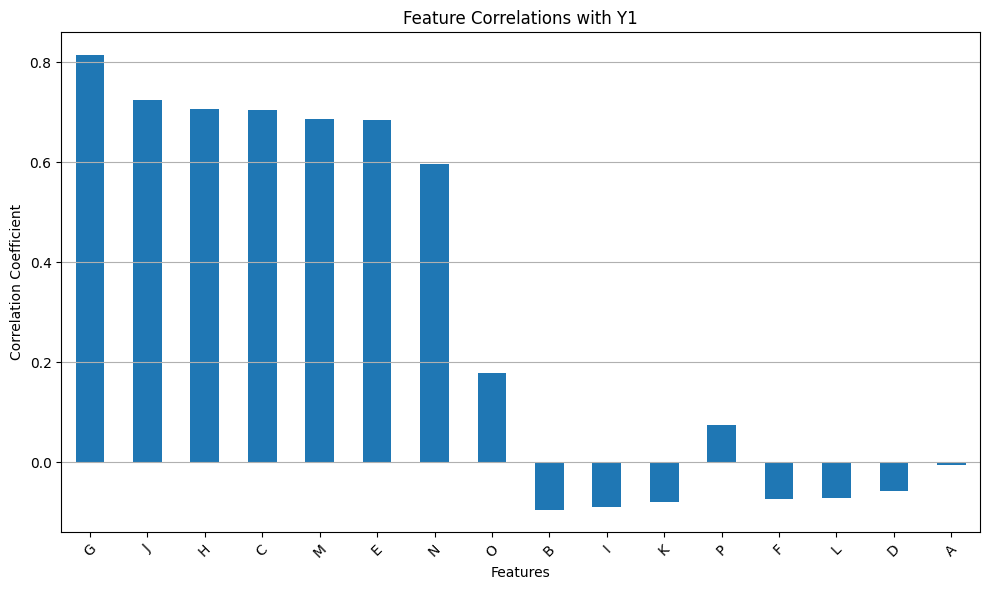

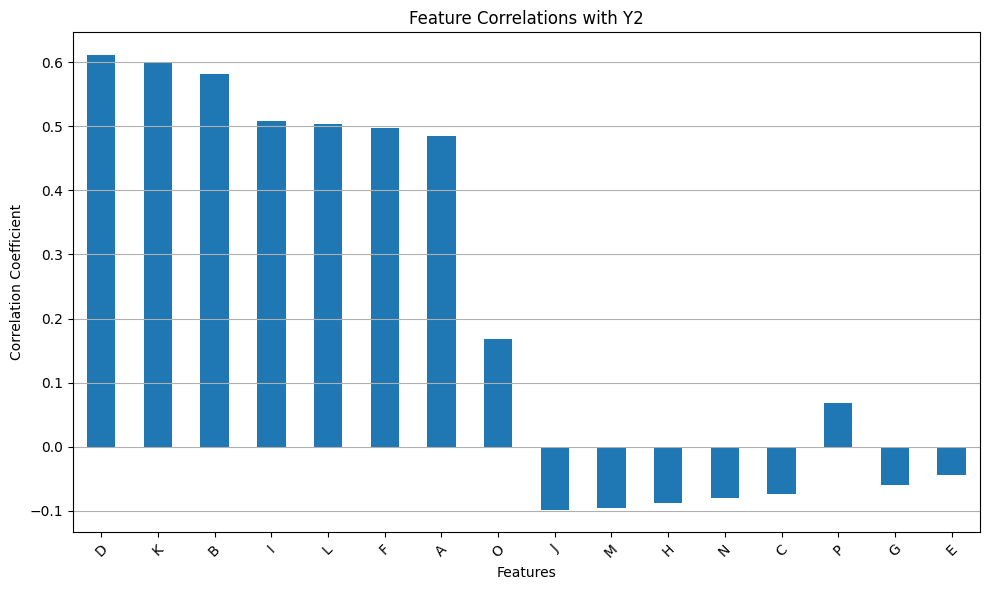

In [20]:
def plot_correlations(corr_series, target_name):
    plt.figure(figsize=(10, 6))
    corr_series.plot(kind='bar')
    plt.title(f'Feature Correlations with {target_name}')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_correlations(corr_y1, 'Y1')
plot_correlations(corr_y2, 'Y2')  

## Nonlinear dependence 

Spearman's

In [24]:
targets = ['Y1', 'Y2']
features = [c for c in train_full.columns if c not in targets and c != "time"]

corr_spearman = train_full[features + targets].corr(method='spearman')

spear_y1 = corr_spearman['Y1'].drop(labels=targets).sort_values(key = lambda s: s.abs(), ascending=False)
spear_y2 = corr_spearman['Y2'].drop(labels=targets).sort_values(key = lambda s: s.abs(), ascending=False)

print("Spearman Correlations with Y1:\n", spear_y1.head(10))
print("Spearman Correlations with Y2:\n", spear_y2.head(10))

Spearman Correlations with Y1:
 G    0.799796
M    0.712658
J    0.709836
E    0.701260
C    0.695609
H    0.688736
N    0.601728
O    0.286263
P    0.053446
I   -0.032693
Name: Y1, dtype: float64
Spearman Correlations with Y2:
 K    0.626156
B    0.623620
D    0.612065
A    0.609209
L    0.561443
F    0.552540
I    0.543824
O    0.121285
P    0.054063
E   -0.016222
Name: Y2, dtype: float64


We can see here that G, M, J, E, C, H, and N have the best spearman correlation with Y1

We can see here that K, B, D, A, L, F, and I have the best spearman correlation with Y2

These are the same 'good ones' as for the regular linear correlations earlier. 

## Checking correlation between Y1 and Y2

In [30]:
corr12 = train_full[['Y1', 'Y2']].corr().iloc[0,1]
corr12

-0.06425029491839156

In [31]:
spear_corr12 = train_full[['Y1', 'Y2']].corr(method='spearman').iloc[0,1]
spear_corr12

-0.008828781758598248

They have near-0 correlation with one another both linear and non-linear.

## Splitting Training Data

In [33]:
def split(df, time_col='time', test_frac=0.2):
    cutoff = df[time_col].quantile(1- test_frac)
    train_idx = df[time_col] <= cutoff
    valid_idx = df[time_col] > cutoff
    return train_idx, valid_idx

train_mask, valid_mask = split(df = train_full)